## User Overview Analysis

* identify the top 10 handsets used by the customers.
* identify the top 3 handset manufacturers
* identify the top 5 handsets per top 3 handset manufacturer
* Make a short interpretation and recommendation to marketing teams

In [37]:
# import required packages and modules
import sys
sys.path.insert(0,'../scripts/')

import pandas as pd
import numpy as np
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
# load the cleaned .csv dataset
df = pd.read_csv("../data/cleaned_telecom_data_source.csv",index_col=0)

In [39]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [40]:
from user_overview import UserOverview

# create an object of UserOverview class
user_ov = UserOverview(df)

In [41]:
# display the top 10 handsets
top_10_handsets = user_ov.get_top_handsets(10)
top_10_handsets

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

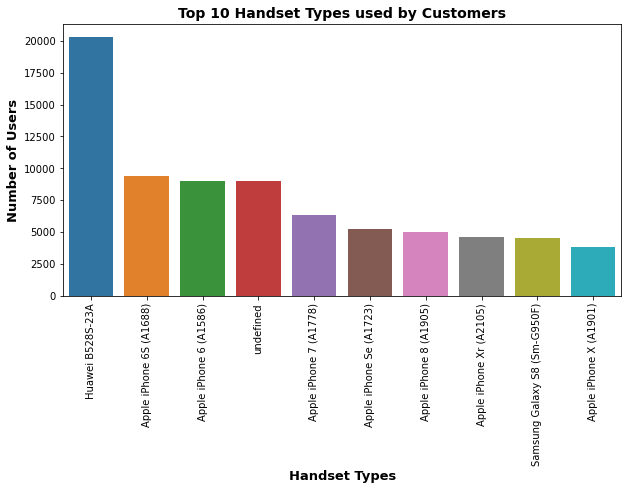

In [42]:
# display the top_handsets result in bar graph
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values)
plt.title('Top 10 Handset Types used by Customers', size=14, fontweight="bold")
plt.xlabel('Handset Types', size=13, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [43]:
# display the top 3 manufacturers
top_3_manufacturers = user_ov.get_top_manufacturers(3)
top_3_manufacturers 


Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

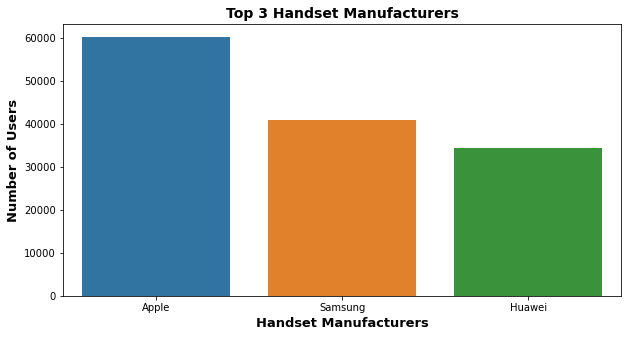

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Handset Manufacturers', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [45]:
# display the top 5 handsets per top 3 manufacturers
top5_handsets_by_top3_manufacturers = user_ov.get_top_handset_by_top_manufacturer(5,3)

****Apple ****
Handset Type
Apple iPhone 6S (A1688)    6760
Apple iPhone 6 (A1586)     6261
Apple iPhone 7 (A1778)     4700
Apple iPhone Se (A1723)    3756
Apple iPhone 8 (A1905)     3544
Name: MSISDN/Number, dtype: int64
****Samsung ****
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3246
Samsung Galaxy J5 (Sm-J530)     2749
Samsung Galaxy A5 Sm-A520F      2709
Samsung Galaxy J3 (Sm-J330)     2590
Samsung Galaxy S7 (Sm-G930X)    2292
Name: MSISDN/Number, dtype: int64
****Huawei ****
Handset Type
Huawei B528S-23A                  10617
Huawei P20 Lite Huawei Nova 3E     1532
Huawei E5180                       1183
Huawei P20                         1110
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64


In [46]:
# top5_handsets_by_top3_manufacturers

apple_manufacturer = df.loc[df['Handset Manufacturer'] == 'Apple', ['Handset Type']].value_counts().nlargest(5)
samsung_manufacturer = df.loc[df['Handset Manufacturer'] == 'Samsung', ['Handset Type']].value_counts().nlargest(5)
huawei_manufacturer = df.loc[df['Handset Manufacturer'] == 'Huawei', ['Handset Type']].value_counts().nlargest(5)

apple_manufacturer.index
apple_manufacturer.values

array([9419, 9023, 6326, 5187, 4993])

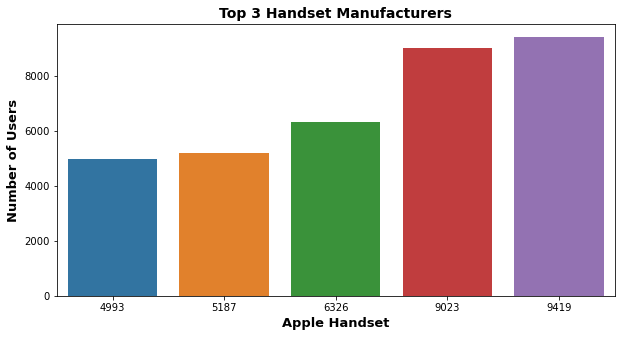

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x=apple_manufacturer, y=apple_manufacturer)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Apple Handset', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

### Insights and Interpretation

* The phones widely used in the network are manufactured by the Apple, Samsung and Huawei, contributing for 135,399 customers. 
* The most used phone is Hwawei B528S-23A covering 20324 of the phones followed by Apple iPhpone 6S (A1688) and Apple iPhone 6 (A1586).
* Samsung Galaxy S8 (Sm-G950F) is the most popular handset from the samsung handsets and The Huawei B528S-23A is one favoured by customers.

### 1. Overview of User's Behavior  

##### on the following applications

* Social Media
* Google
* Email
* YouTube
* Netflix
* Gaming
* Other

##### Aggregate users information based on the following columns:
1. Number of xDR sessions
2. Session duration
3. the total download (DL) and upload (UL) data
4. the total data volume (in Bytes) during this session for each application


In [48]:
agg_df = df.copy()

agg_df.insert(45,"Total Data (Bytes)","")
agg_df["Total Data (Bytes)"] = pd.to_numeric(agg_df["Total Data (Bytes)"])
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [49]:
# total data usage of user for above listed applications
agg_df["Social Media (Bytes)"] = agg_df["Social Media DL (Bytes)"] + agg_df['Social Media UL (Bytes)']
agg_df["Google (Bytes)"]       = agg_df["Google DL (Bytes)"] + agg_df["Google UL (Bytes)"]
agg_df['Youtube (Bytes)']      = agg_df["Youtube DL (Bytes)"] + agg_df["Youtube UL (Bytes)"]
agg_df['Netflix (Bytes)']      = agg_df["Netflix DL (Bytes)"] + agg_df["Netflix UL (Bytes)"]
agg_df["Gaming (Bytes)"]       = agg_df["Gaming DL (Bytes)"] + agg_df["Gaming UL (Bytes)"]
agg_df['Email (Bytes)']        = agg_df["Email DL (Bytes)"] + agg_df["Email UL (Bytes)"]
agg_df['Other (Bytes)']        = agg_df["Other DL (Bytes)"]+ agg_df["Other UL (Bytes)"]
agg_df['Total Data (Bytes)']   = agg_df['Total UL (Bytes)'] + agg_df['Total DL (Bytes)']


In [50]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [51]:
aggregate = {"Bearer Id": 'count', 'Dur. (ms)':'sum', 'Total UL (Bytes)': 'sum', 
'Total DL (Bytes)': 'sum','Total Data (Bytes)':'sum'}
aggregated_data = agg_df.groupby('MSISDN/Number').agg(aggregate)
# aggregated_data['Total Data (Bytes)'] = aggregated_data['Total UL (Bytes)'] + aggregated_data['Total DL (Bytes)']
aggregated_data.head()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
MSISDN/Number,,,,,
3.360100e+10,1,116720.0,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,1,181230.0,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,1,134969.0,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,1,49878.0,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,2,37104.0,94280527.0,1.363130e+09,1.457411e+09


In [52]:
# convert the data of each application into megabytes

agg_df["Social Media (MB)"] = user_ov.convert_bytes_to_megabytes(agg_df["Social Media (Bytes)"])
agg_df["Google (MB)"]       = user_ov.convert_bytes_to_megabytes(agg_df["Google (Bytes)"])
agg_df['Youtube (MB)']      = user_ov.convert_bytes_to_megabytes(agg_df["Youtube (Bytes)"])
agg_df['Netflix (MB)']      = user_ov.convert_bytes_to_megabytes(agg_df["Netflix (Bytes)"])
agg_df["Gaming (MB)"]       = user_ov.convert_bytes_to_megabytes(agg_df["Gaming (Bytes)"])
agg_df['Email (MB)']        = user_ov.convert_bytes_to_megabytes(agg_df["Email (Bytes)"])
agg_df['Other (MB)']        = user_ov.convert_bytes_to_megabytes(agg_df["Other (Bytes)"])
agg_df['Total Data (MB)']    = user_ov.convert_bytes_to_megabytes(agg_df["Total Data (Bytes)"]) 

In [53]:
# save the data into .csv file for later usage
agg_df.to_csv("../data/cleaned_telecom_data_source.csv")

In [54]:
app_columns = ['MSISDN/Number','Social Media (MB)','Google (MB)', 'Youtube (MB)','Netflix (MB)','Gaming (MB)', 'Email (MB)', 'Other (MB)', 'Total Data (MB)'] 

In [55]:
user_behavior = agg_df[app_columns].groupby('MSISDN/Number').sum().sample(5)
user_behavior

,Social Media (MB),Google (MB),Youtube (MB),Netflix (MB),Gaming (MB),Email (MB),Other (MB),Total Data (MB)
MSISDN/Number,,,,,,,,
3.365984e+10,1.444286,5.840675,28.236480,23.926702,493.790175,4.036571,766.334997,563.012540
3.365135e+10,4.662769,12.891291,52.736699,63.594366,813.783290,1.541410,1194.916548,967.023475
3.362331e+10,2.118385,7.234727,14.177658,34.769024,481.956360,2.246904,195.389128,558.564838
3.366905e+10,0.731496,10.088599,23.367265,34.551685,292.457363,1.201684,715.818862,376.703118
3.377040e+10,3.472243,3.098910,4.457782,10.867886,859.010933,2.749272,56.876927,884.578694


### 2. Exploratory Data Analysis 

#### Graphical Univariate Analysis
* an analysis of a sigle variable

In [56]:
coloumns_to_analyze = ['Dur. (ms)', 'MSISDN/Number', 'Social Media (MB)', 'Google (MB)', 'Youtube (MB)',   
                'Netflix (MB)', 'Gaming (MB)', 'Email (MB)', 'Other (MB)', 'Total Data (MB)']

aggregated_variables_df = agg_df[coloumns_to_analyze]
aggregated_variables_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dur. (ms)          150001 non-null  float64
 1   MSISDN/Number      150001 non-null  float64
 2   Social Media (MB)  150001 non-null  float64
 3   Google (MB)        150001 non-null  float64
 4   Youtube (MB)       150001 non-null  float64
 5   Netflix (MB)       150001 non-null  float64
 6   Gaming (MB)        150001 non-null  float64
 7   Email (MB)         150001 non-null  float64
 8   Other (MB)         150001 non-null  float64
 9   Total Data (MB)    150001 non-null  float64
dtypes: float64(10)
memory usage: 12.6 MB


In [57]:
# Convert Dur. (ms) to Second and rename the name

aggregated_variables_df['Dur. (ms)'] = user_ov.convert_ms_to_sec(agg_df['Dur. (ms)'])
aggregated_variables_df.rename(columns = {'Dur. (ms)':'Dur. (sec)'}, inplace=True)

In [58]:
# use the data_plots file( utitlity functions)
from data_plots import plot_hist,plot_count,plot_box,plot_scatter,plot_bar,plot_box_multi,plot_heatmap

# plot_hist(aggregated_variables_df, 'Google (MB)', 'green')
# plot_hist(aggregated_variables_df, 'Dur. (sec)', 'green')
aggregated_variables_df.to_csv('../data/applications_data.csv')
aggregated_variables_df.head()

,Dur. (sec),MSISDN/Number,Social Media (MB),Google (MB),Youtube (MB),Netflix (MB),Gaming (MB),Email (MB),Other (MB),Total Data (MB)
0,23.652,3.366496e+10,1.570185,2.905912,18.355943,17.855187,292.426453,3.701304,180.558843,345.629377
1,45.104,3.368185e+10,1.933278,4.414096,39.359124,35.565545,609.920783,0.937385,541.959383,707.185356
2,41.762,3.376063e+10,1.726277,10.229119,34.425237,23.751202,229.980251,3.363124,414.908351,307.690973
3,1.509,3.375034e+10,0.657493,11.811761,36.534765,15.092588,810.387875,2.070983,761.837216,889.352748
4,9.009,3.369980e+10,0.912788,7.748843,34.222253,17.539799,531.237049,2.110349,564.619822,607.681403


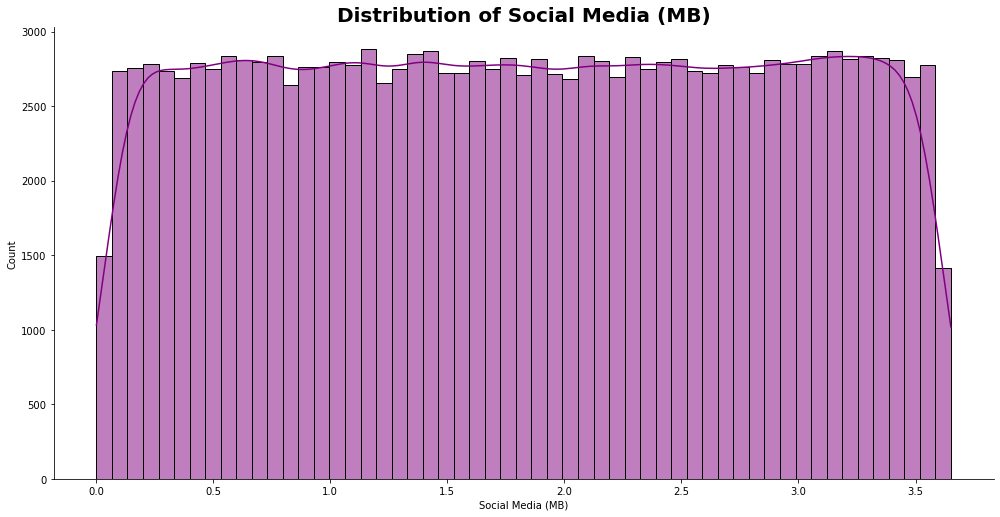

In [59]:
plot_hist(aggregated_variables_df, 'Social Media (MB)', 'purple')

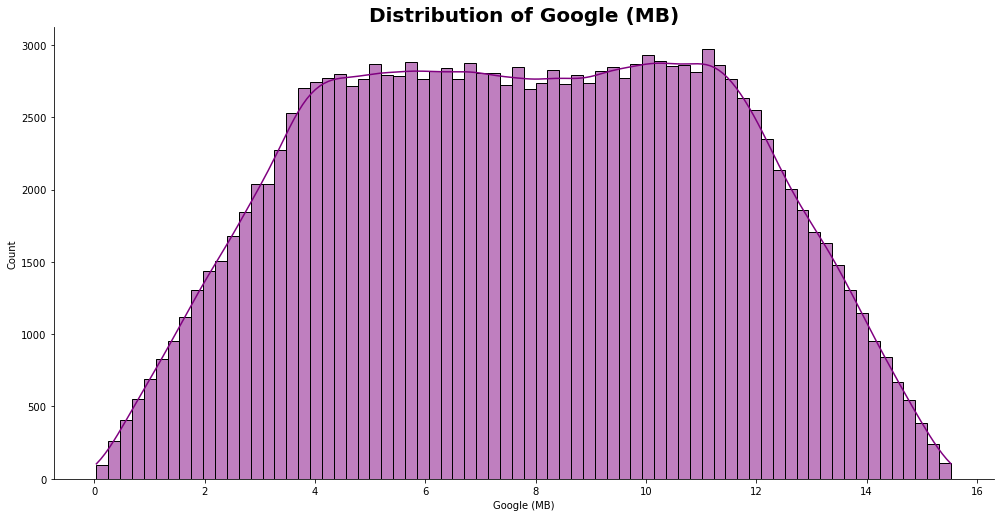

In [60]:
plot_hist(aggregated_variables_df, 'Google (MB)', 'purple')

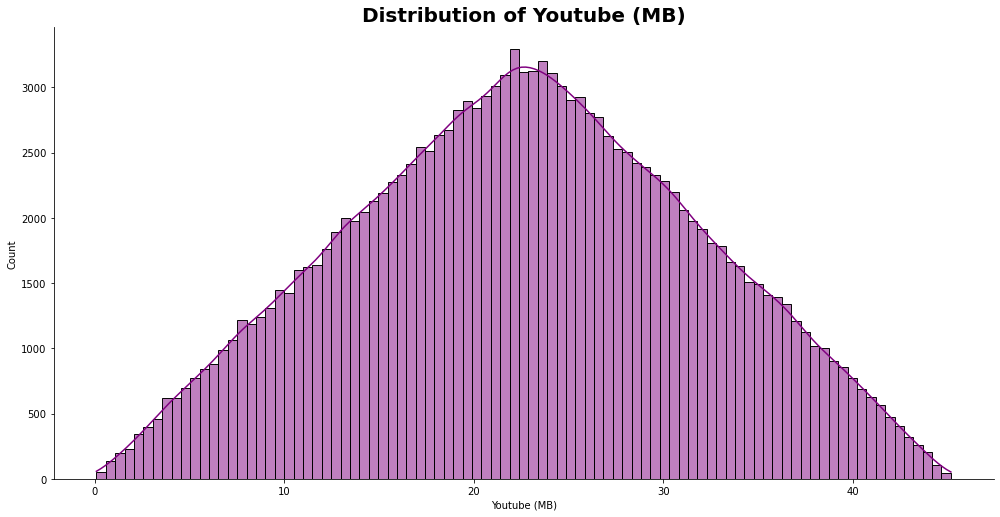

In [61]:
plot_hist(aggregated_variables_df, 'Youtube (MB)', 'purple')

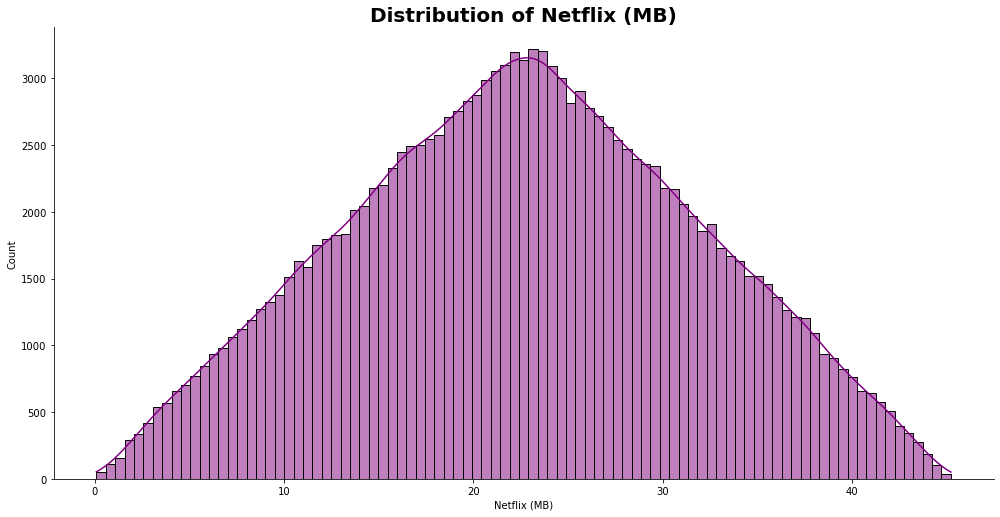

In [62]:
plot_hist(aggregated_variables_df, 'Netflix (MB)', 'purple')

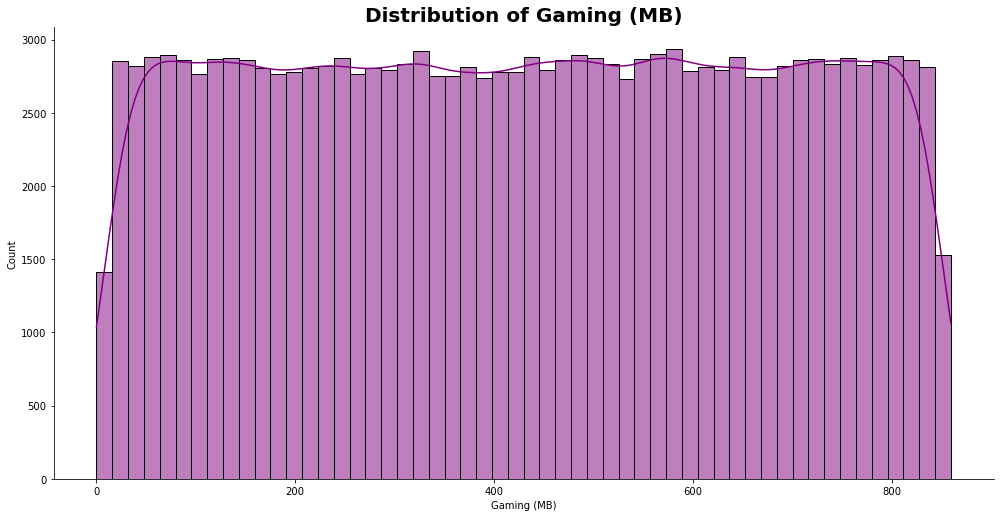

In [63]:
plot_hist(aggregated_variables_df, 'Gaming (MB)', 'purple')

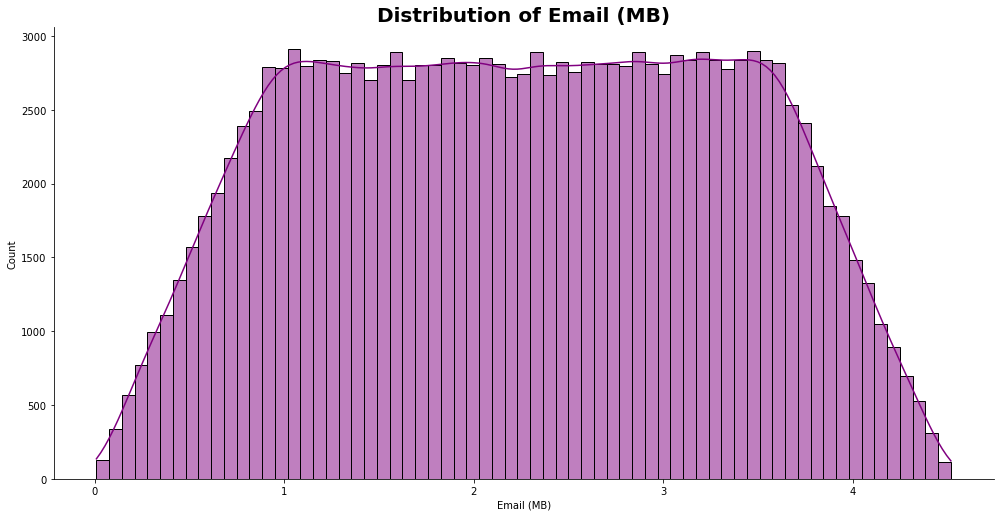

In [64]:
plot_hist(aggregated_variables_df, 'Email (MB)', 'purple')

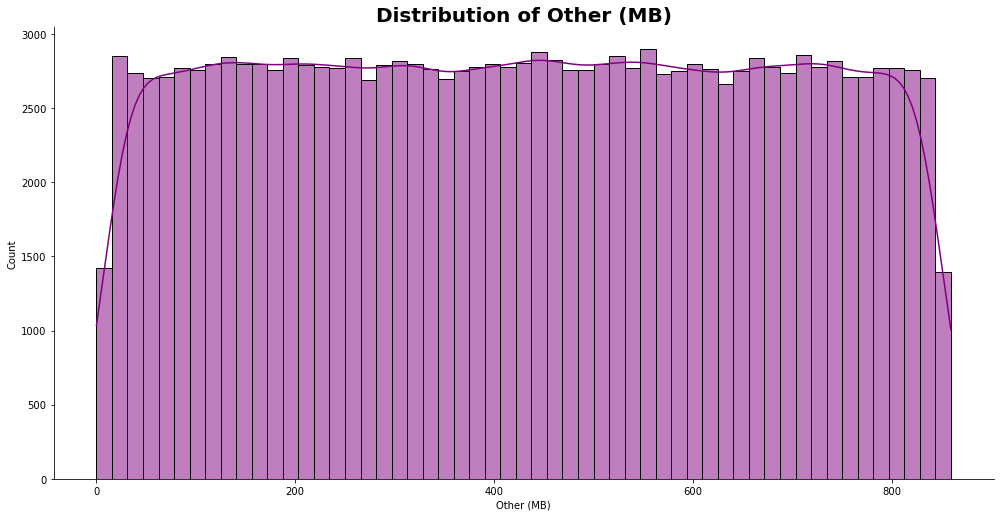

In [65]:
plot_hist(aggregated_variables_df, 'Other (MB)', 'purple')

### Multivariate Analysis of each application

In [66]:
# Social Media (MB)
# Google (MB)
# Youtube (MB)
# Netflix (MB) 
# Gaming (MB)
# Email (MB)
# Other (MB)
# Total Data (MB) 

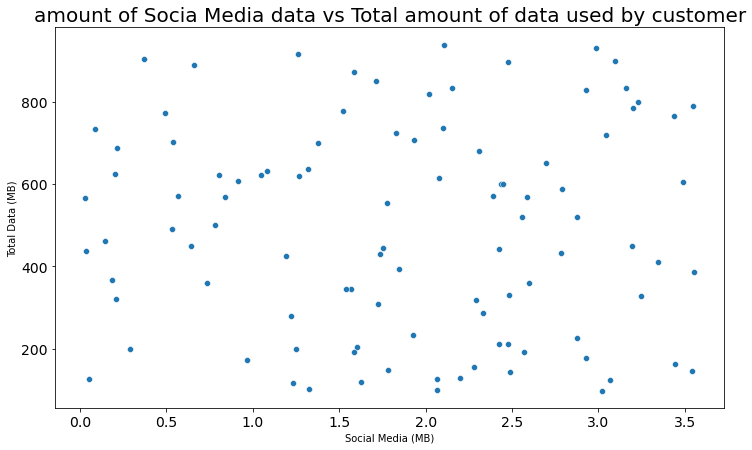

In [67]:
plot_scatter(aggregated_variables_df.head(100), "Social Media (MB)", 
                                                "Total Data (MB)",
                                                "amount of Socia Media data vs Total amount of data used by customer",
                                                None,
                                                None)
                                                

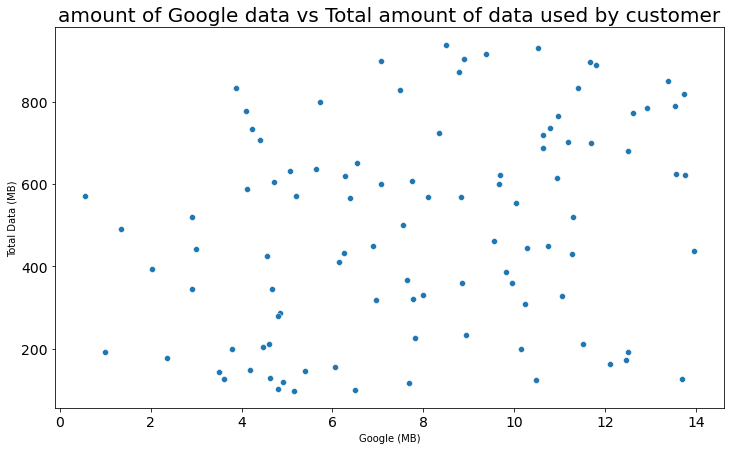

In [68]:
# 
plot_scatter(aggregated_variables_df.head(100), "Google (MB)", 
                                                "Total Data (MB)",
                                                "amount of Google data vs Total amount of data used by customer",
                                                None,
                                                None)

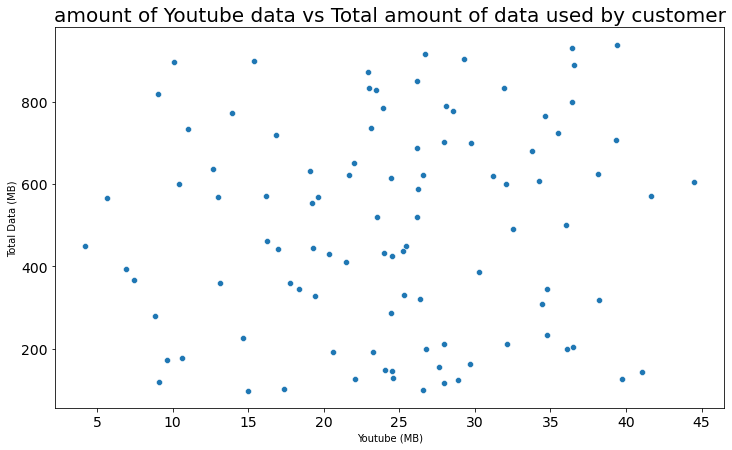

In [69]:
# bivariate analysis of Youtube data vs Total data consumed by customer
plot_scatter(aggregated_variables_df.head(100), "Youtube (MB)", 
                                                "Total Data (MB)",
                                                "amount of Youtube data vs Total amount of data used by customer",
                                                None,
                                                None)

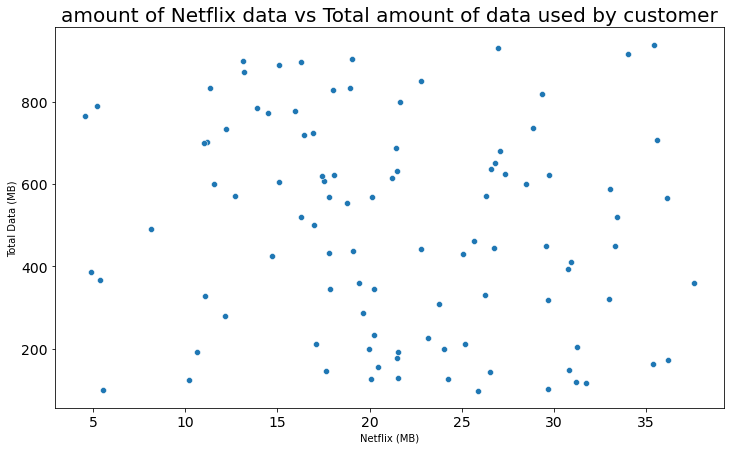

In [70]:
# bivariate analysis of Netflix data vs Total data consumed by customer
plot_scatter(aggregated_variables_df.head(100), "Netflix (MB)", 
                                                "Total Data (MB)",
                                                "amount of Netflix data vs Total amount of data used by customer",
                                                None,
                                                None)

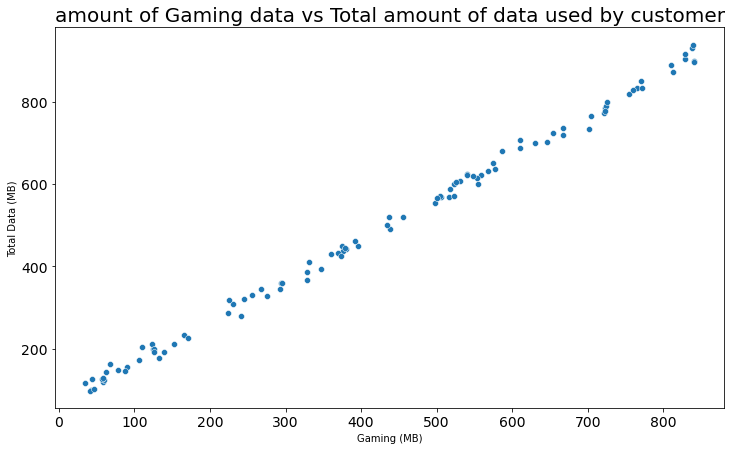

In [71]:

# bivariate analysis of Gaming data vs Total data consumed by customer
plot_scatter(aggregated_variables_df.head(100), "Gaming (MB)", 
                                                "Total Data (MB)",
                                                "amount of Gaming data vs Total amount of data used by customer",
                                                None,
                                                None)

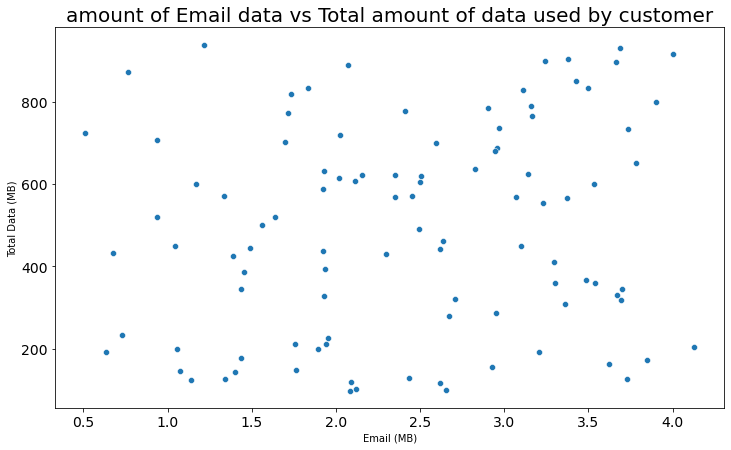

In [72]:
# bivariate analysis of Email data vs Total data consumed by customer
plot_scatter(aggregated_variables_df.head(100), "Email (MB)", 
                                                "Total Data (MB)",
                                                "amount of Email data vs Total amount of data used by customer",
                                                None,
                                                None)

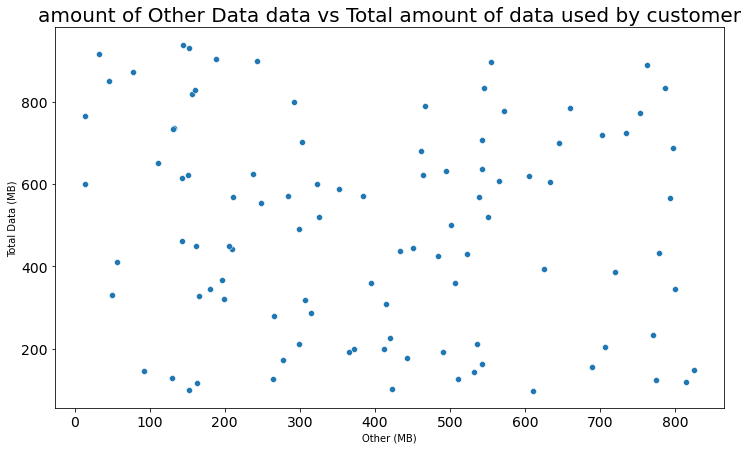

In [73]:
# bivariate analysis of Other data vs Total data consumed by customer                                              #
plot_scatter(aggregated_variables_df.head(100), "Other (MB)", 
                                                "Total Data (MB)",
                                                "amount of Other Data data vs Total amount of data used by customer",
                                                None,
                                                None)

In [74]:
applications = ['Social Media (MB)', 'Google (MB)', 'Youtube (MB)',   
                'Netflix (MB)', 'Gaming (MB)', 'Email (MB)', 'Other (MB)']

aggregated_apps_df = aggregated_variables_df[applications]
aggregated_apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Social Media (MB)  150001 non-null  float64
 1   Google (MB)        150001 non-null  float64
 2   Youtube (MB)       150001 non-null  float64
 3   Netflix (MB)       150001 non-null  float64
 4   Gaming (MB)        150001 non-null  float64
 5   Email (MB)         150001 non-null  float64
 6   Other (MB)         150001 non-null  float64
dtypes: float64(7)
memory usage: 13.2 MB


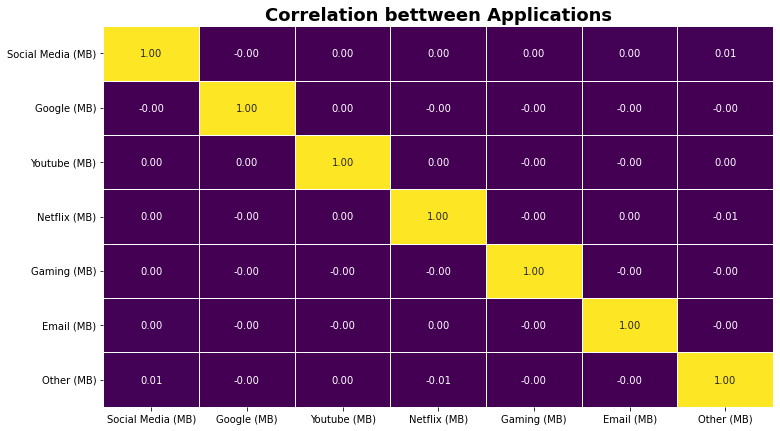

In [75]:
# perform correlation analysis
correlation = aggregated_apps_df.corr()
plot_heatmap(correlation, 'Correlation bettween Applications')

In [76]:
# Variable transformation
scaled_explore_feature_df = aggregated_variables_df[['MSISDN/Number', 'Total Data (MB)', 'Dur. (sec)']]

scaled_explore_feature_df['Dur. (sec)'] = aggregated_variables_df['Dur. (sec)']/1000
scaled_explore_feature_df = scaled_explore_feature_df.rename(columns={'Dur. (sec)': 'Duration'})

scaled_explore_feature_df_agg = scaled_explore_feature_df.groupby('MSISDN/Number').agg({'Duration':'sum', 'Total Data (MB)': 'sum'})

deciles = pd.qcut(scaled_explore_feature_df_agg['Duration'], 5, labels=["1st_decile", "2nd_decile",
                                                      "3rd_decile", "4th_decile",
                                                      "5th_decile"])



explore_feature_df_with_decile = scaled_explore_feature_df_agg.copy()

explore_feature_df_with_decile['Decile'] = deciles

explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('Decile').agg({'Total Data (MB)': 'sum',
                                                                                           'Duration': 'sum'})
explore_feature_df_with_decile_agg

,Total Data (MB),Duration
Decile,,
1st_decile,1.114296e+07,251.430571
2nd_decile,1.089909e+07,545.295408
3rd_decile,1.190909e+07,727.057089
4th_decile,1.390696e+07,1048.529874
5th_decile,2.650708e+07,1902.057509


<Figure size 720x504 with 0 Axes>

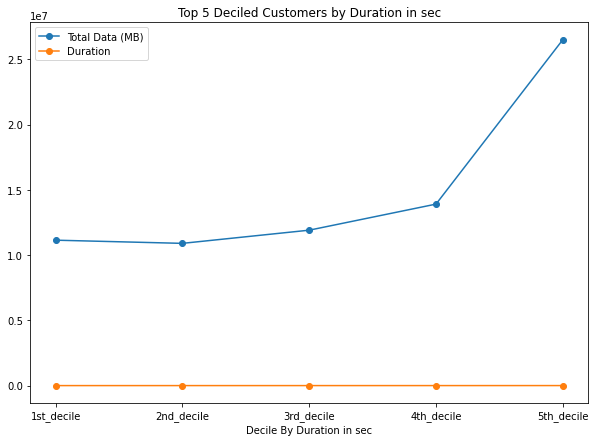

In [77]:
plt.figure(figsize=(10,7))
explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 Deciled Customers by Duration in sec').set_xlabel("Decile By Duration in sec")
plt.xticks(np.arange(len(explore_feature_df_with_decile_agg.index)), explore_feature_df_with_decile_agg.index)

plt.show()